# Realidad sociopolítica del ciudadano colombiano como determinante de las movilizaciones sociales del 2021, Análisis exploratorio de datos con python.

se pretende describir los principales factores en materia económica, política y social que desencadenaron las movilizaciones sociales en Colombia entre abril y mayo de 2021, con base en los datos recopilados en la encuesta Latinobarómetro 2020: un estudio de opinión pública anual que aplica aproximadamente 20.000
encuestas a ciudadanos de 18 países de América Latina, referente a percepciones sobre la Democracia, la
Economía y la Sociedad.

## 1. Inicialización de variables y carga de librerías

**Importación de librerías y lectura del archivo que contiene los datos de la encuesta Latinobarómetro 2020. Filtramos los datos a la variable $idenpa=170$, que representa el identificador de Colombia**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.style as style
import matplotlib
from prettytable import PrettyTable


datos = pd.read_csv('r.csv')
datos = datos[datos['idenpa'] == 170]


**Establecemos el estilo, la fuentes y cargamos el mapa de color:**

In [2]:
style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.family'] = 'Times New Roman'
colormap = matplotlib.colormaps['tab10']


## 2. Descripción de la muestra:
Del total de la base de datos, se filtró para tomar los resultados de Colombia, con una muestra de 1200 ciudadanos colombianos, los cuales representan cerca de 30 millones de ciudadanos colombianos, según el DANE. En cuanto a las variables demográficas de la población, la muestra representa muy bien los datos poblacionales de acuerdo al último censo del DANE. En particular, la siguiente descripción se hace considerando la muestra de estudio (1200 ciudadanos colombianos).

## 3. Graficación de los datos y análisis de resultados:

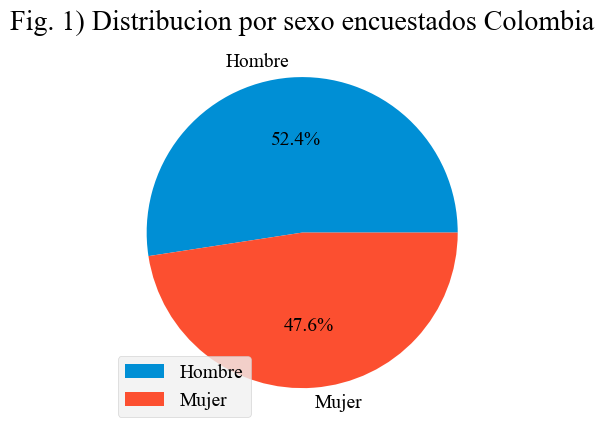

In [3]:

# Obtener los datos de la columna "sexo", esta columna contiene datos numéricos (1=Hombre, 2=Mujer),
datosSexo = datos['sexo']

# Calcular los conteos de cada categoría
conteos = datosSexo.value_counts()

# Crear el gráfico de torta
plt.figure()
plt.pie(conteos, labels=['Hombre', 'Mujer'], autopct='%1.1f%%')

# Añadir leyenda
plt.legend(loc='lower left')
plt.title('Fig. 1) Distribucion por sexo encuestados Colombia')
plt.show()


Como se puede observar en la Figura 1, de los 1200 encuestados, 571 son hombres ($47.6\%$) y 629 son mujeres ($52.4\%$). Así mismo, en la Figura 2, se discrimina la muestra en cuanto a la edad, en la cual se evidencia una mayor presencia de población joven y adulta en el territorio colombiano. Si se mira por religión aproximadamente el $67\%$ de la muestra se identifica como católica, el $16\%$ como cristiano no católico, el $0.3\%$ como ateo, y el $11\%$ de la muestra no se identifica con ninguna religión. (Figura 3).

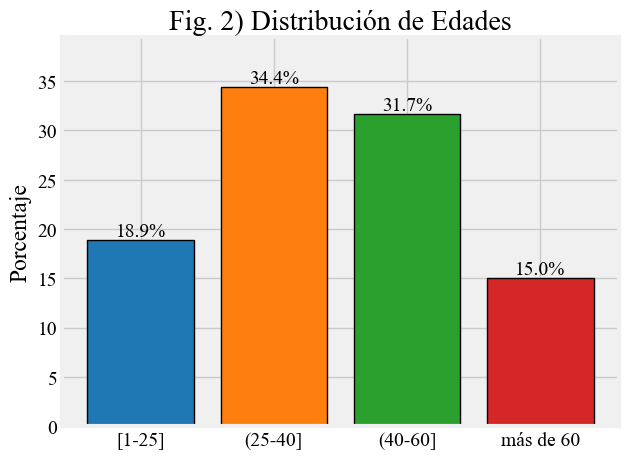

In [4]:
edades = datos['edad']

# Define the age range limits
rangos_edad = [1, 25, 40, 60, np.inf]

# Create the counters for each age range
frecuencia_rangos = np.zeros(len(rangos_edad) - 1)

# Count the frequency of the data in each age range
for i in range(len(rangos_edad) - 1):
    frecuencia_rangos[i] = ((edades >= rangos_edad[i]) & (edades < rangos_edad[i+1])).sum()

# Calculate the percentages
porcentajes_rangos = (frecuencia_rangos / sum(frecuencia_rangos)) * 100

# Define the labels for the age ranges
etiquetas_rangos = ['[1-25]', '(25-40]', '(40-60]', 'más de 60']

# Create the vertical bar chart
plt.figure()
plt.bar(range(len(porcentajes_rangos)), porcentajes_rangos, color=colormap.colors, edgecolor='black', linewidth=1)

# Set the labels on the x-axis
plt.xticks(range(len(porcentajes_rangos)), etiquetas_rangos)

# Set the title of the chart
plt.title('Fig. 2) Distribución de Edades')

# Add percentage labels above the bars
for i, v in enumerate(porcentajes_rangos):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# Set the y-axis limits in percentage
plt.ylim([0, max(porcentajes_rangos) + 5])

# Set the title of the y-axis
plt.ylabel('Porcentaje')

# Show the plot
plt.show()

A continuación convertimos los datos numéricos para las religiones en sus respectivas categorías según el documento adjunto "ConvencionesDatos2020.xlsx" y mostraremos la gráfica resultante:

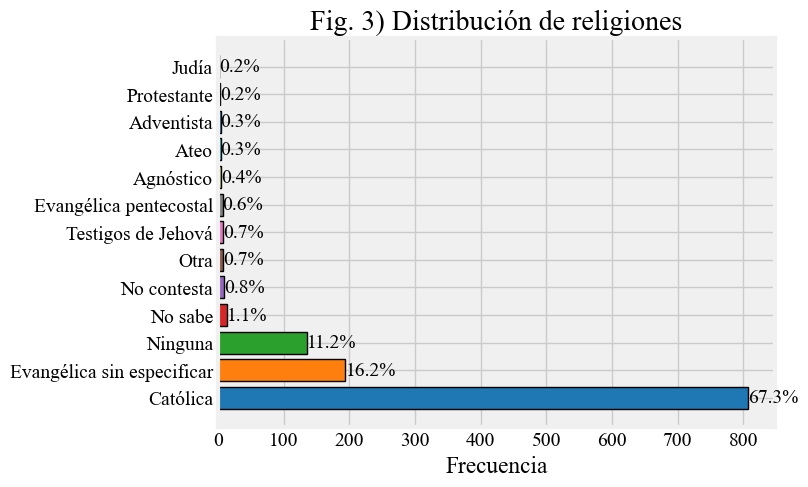

In [5]:
# Definimos la correspondencia entre los valores numéricos y la religión que representan:
correspondencias = {1: "Católica",
                    2: "Evangélica sin especificar",
                    3: "Evangélica bautista",
                    4: "Evangélica metodista",
                    5: "Evangélica pentecostal",
                    6: "Adventista",
                    7: "Testigos de Jehová",
                    8: "Mormón",
                    9: "Judía",
                    10: "Protestante",
                    11: "Cultos afro/americanos, Umbanda, etc",
                    12: "Creyente, no pertenece a Iglesia",
                    13: "Agnóstico",
                    14: "Ateo",
                    96: "Otra",
                    97: "Ninguna",
                    -1: "No sabe",
                    -2: "No contesta",
                    -3: "No aplicable",
                    -4: "No preguntada",
                    -5: "No sabe / No contesta"}

# Obtenemos el valor numérico en la tabla de datos según su respuesta en la encuesta. Los valores nulos se reemplazan por -2 (No contesta).
valores_numericos = datos['s10'].astype(str)
valores_numericos = valores_numericos.replace('nan', '-2')


# Transformamos los valores numéricos en sus correspondientes religiones según la tabla de correspondencias:
valores = valores_numericos.map(lambda x: correspondencias.get(int(np.floor(float(x))), x))


# Replace the numerical values in the "Religion" column with the corresponding
# religions in textReligion

# Obtenems los valores de frecuencia, etiquetas y los porcentajes, y los alamcenamos en variables:
frecuencias_religiones = valores.value_counts()
etiquetas_religiones = frecuencias_religiones.index
porcentajes_religiones = (frecuencias_religiones / sum(frecuencias_religiones)) * 100


# Graficamos una gráfica de barras horizontales basada en los datos obtenidos:
plt.figure()
plt.barh(etiquetas_religiones, frecuencias_religiones, color=colormap.colors, edgecolor='black', linewidth=1)

# Ponemos el título de la gráfica
plt.title('Fig. 3) Distribución de religiones')

# Nombramos el eje x
plt.xlabel('Frecuencia')


# Añaadimos las etiquetas de porcentaje a la derecha de cada barra
for i, v in enumerate(porcentajes_religiones):
    plt.text(frecuencias_religiones[i], i, f'{v:.1f}%', ha='left', va='center')

# Show the plot
plt.show()

En cuanto a nivel de estudios de los encuestados, de acuerdo a la Figura 4, al menos el $85%\$ de los encuestados ha completado la educación básica, y más de la mitad de toda la muestra ha alcanzado el grado de bachiller. Aproximadamente, el 25% de los encuestados ha estado dentro del sistema de educación superior, y de estos, el 80% ha logrado culminar su programa profesional. En cuanto a la tasa de analfabetización, marca un 6%, mejor que la media de los países latinoamericanos, pero muy por encima de la media de los países de la OCDE. (UNESCO, s.f)

Se requiere recodificar los datos de nivel de estudios para considerar únicamente las categorías:

* Sin dato
* Analfabeta
* Básica incompleta
* Básica completa
* Secundaria, media, técnica incompleta.
* Secundaria, media, técnica completa.
* Superior incompleta
* Superior completa

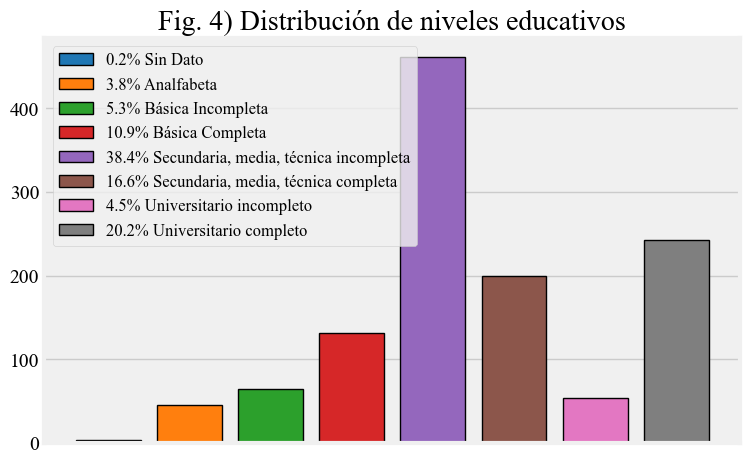

In [6]:
correspondencias = {0: "Sin Dato",
                    1: "Analfabeta",
                    2: "Básica Incompleta",
                    3: "Básica Incompleta",
                    4: "Básica Incompleta",
                    5: "Básica Incompleta",
                    6: "Básica Completa",
                    7: "Secundaria, media, técnica incompleta",
                    8: "Secundaria, media, técnica incompleta",
                    9: "Secundaria, media, técnica incompleta",
                    10: "Secundaria, media, técnica incompleta",
                    11: "Secundaria, media, técnica incompleta",
                    12: "Secundaria, media, técnica incompleta",
                    13: "Secundaria, media, técnica Completa",
                    14: "Universitario incompleto",
                    15: "Universitario completo",
                    16: "Secundaria, media, técnica incompleta",
                    17: "Secundaria, media, técnica completa"}

orden = ["Sin Dato", "Analfabeta", "Básica Incompleta", "Básica Completa", "Secundaria, media, técnica incompleta", "Secundaria, media, técnica completa", "Universitario incompleto", "Universitario completo"]

# Obteniendo los valores de la columna "Nivel educativo", esta columna contiene datos numéricos
valores_numericos = datos['s16'].astype(str)


# Guardamos los valores correspondientes a cada nivel educativo en una variable, utilizando la tabla de correspondencias
valores = valores_numericos.map(lambda x: correspondencias.get(int(np.floor(float(x))), x))

# Contar la frecuencia de cada nivel educativo, las etiquetas y los porcentajes
frecuencia_niveles = valores.value_counts()
etiquetas_niveles = frecuencia_niveles.index
porcentajes_niveles = (frecuencia_niveles / sum(frecuencia_niveles)) * 100


data_plot = pd.DataFrame({'Niveles': etiquetas_niveles, 'Frecuencia': frecuencia_niveles, 'Porcentaje': porcentajes_niveles})
data_plot = data_plot.sort_values('Niveles', key=lambda x: x.map(orden.index))

## Crear el gráfico de barras vertical
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(data_plot['Niveles'], data_plot['Frecuencia'], color=colormap.colors, edgecolor='black', linewidth=1)

plt.title('Fig. 4) Distribución de niveles educativos')

## Creando leyenda con etiquetas y porcentajes
legend_elements = [matplotlib.patches.Patch(facecolor=colormap.colors[i], edgecolor='black', linewidth=1, label=f'{data_plot["Porcentaje"].iloc[i]:.1f}% {data_plot["Niveles"].iloc[i]}') for i in range(len(data_plot))]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12)

## Cambiando tel tamaño de la caja de dibujo y ocultando las etiquetas del eje x
bbox_to_anchor=(1.05, 1)
ax.get_xaxis().set_visible(False)

plt.show()


Las condiciones socioeconómicas de los encuestados (Muy bueno, bueno, regular, malo) fue apreciada por el encuestador de acuerdo a condiciones de la vivienda, del amueblado, aspecto general del entrevistado, etc. (Figura 5)

La distribución general de la muestra se comporta similarmente de acuerdo a las dos variables, en donde el 56% de los participantes califican dentro de unas condiciones socioeconómicas buenas o muy buenas, y el 40% tienen condiciones de vida regulares o malas.

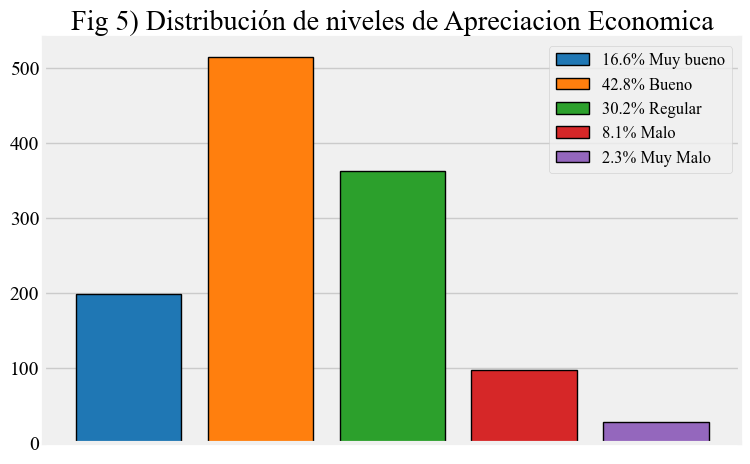

In [7]:
correspondencias = {1: "Muy bueno",
                    2: "Bueno",
                    3: "Regular",
                    4: "Malo",
                    5: "Muy Malo"}

# Obteniendo los datos de apreciación económica
valores_numericos = datos['s30'].astype(int)

# Guardamos los valores correspondientes a cada nivel educativo en una variable, utilizando la tabla de correspondencias
valores = valores_numericos.map(lambda x: correspondencias.get(x))

##Contar la frecuencia de cada nivel educativo, las etiquetas y los porcentajes
frecuencia_economica = valores.value_counts()
etiquetas_economica = frecuencia_economica.index
porcentajes_economica = (frecuencia_economica / sum(frecuencia_economica)) * 100

## ordenar los datos de acuerdo al orden de los niveles
data_plot = pd.DataFrame({'Niveles': etiquetas_economica, 'Frecuencia': frecuencia_economica, 'Porcentaje': porcentajes_economica})
data_plot['Orden'] = data_plot['Niveles'].map(lambda x: list(correspondencias.keys())[list(correspondencias.values()).index(x)])
data_plot = data_plot.sort_values('Orden')

# Crear el gráfico de barras vertical con los datos ordenados
fig, ax = plt.subplots(figsize=(8, 5))
plt.title('Fig 5) Distribución de niveles de Apreciacion Economica')

bars = ax.bar(data_plot['Niveles'], data_plot['Frecuencia'], color=colormap.colors, edgecolor='black', linewidth=1)

legend_elements = [matplotlib.patches.Patch(facecolor=colormap.colors[i], edgecolor='black', linewidth=1, label=f'{data_plot["Porcentaje"].iloc[i]:.1f}% {data_plot["Niveles"].iloc[i]}') for i in range(len(data_plot))]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12)

## Cambiando el tamaño de la caja de dibujo y ocultando las etiquetas del eje x
bbox_to_anchor=(1.05, 1)
ax.get_xaxis().set_visible(False)

Ahora bien, haciendo énfasis en el objeto de estudio del presente artículo, al considerar el comportamiento de
los participantes en cuanto a la satisfacción con la Democracia se puede decir que tan solo el $17\%$ de los
participantes se manifiesta satisfecho mediana o completamente con la Democracia, en contraste con casi un
$80.1\%$ que se siente no muy satisfecho o nada satisfecho con la Democracia en Colombia. Esta percepción
tiene un importante trasfondo, y puede explicar en cierta medida algunos resultados anteriores.

[]

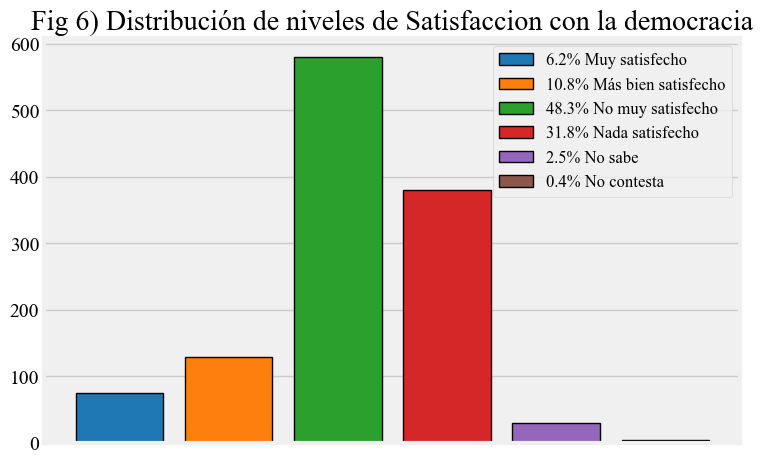

In [8]:
correspondencias = {1: "Muy satisfecho",
                    2: "Más bien satisfecho",
                    3: "No muy satisfecho",
                    4: "Nada satisfecho",
                    -1: "No sabe",
                    -2: "No contesta",
                    -3: "No aplicable",
                    -4: "No preguntada",
                    -5: "No sabe / No contesta"}

# Se establece el orden a seguir en la gráfica
orden = ["Muy satisfecho", "Más bien satisfecho", "No muy satisfecho", "Nada satisfecho", "No sabe", "No contesta", "No aplicable", "No preguntada"]

# Obteniendo los datos de satisfacción con la democracia
valores_numericos = datos['P11STGBS_A'].astype(int)

# Guardamos los valores correspondientes a cada nivivel de satisfación democrática en una variable, utilizando la tabla de correspondencias
valores = valores_numericos.map(lambda x: correspondencias.get(x))

# Obtener la frecuencia de cada nivel de satisfacción, las etiquetas y los porcentajes
frecuencia_democtratica = valores.value_counts()
etiquetas_democratica = frecuencia_democtratica.index
porcentajes_democratica = (frecuencia_democtratica / sum(frecuencia_democtratica)) * 100

## ordenar los datos de acuerdo al orden de los niveles
data_plot = pd.DataFrame({'Niveles': etiquetas_democratica, 'Frecuencia': frecuencia_democtratica, 'Porcentaje': porcentajes_democratica})
data_plot['Orden'] = data_plot['Niveles'].map(lambda x: orden.index(x))
data_plot = data_plot.sort_values('Orden')


# Crear el gráfico de barras vertical con los datos ordenados
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(data_plot['Niveles'], data_plot['Frecuencia'], color=colormap.colors, edgecolor='black', linewidth=1)

# Establecemos el título de la gráfica
plt.title('Fig 6) Distribución de niveles de Satisfaccion con la democracia')


# Crear leyenda con etiquetas y porcentajes
legend_elements = [matplotlib.patches.Patch(facecolor=colormap.colors[i], edgecolor='black', linewidth=1, label=f'{data_plot["Porcentaje"].iloc[i]:.1f}% {data_plot["Niveles"].iloc[i]}') for i in range(len(data_plot))]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12)

## Cambiando el tamaño de la caja de dibujo y ocultando las etiquetas del eje x
bbox_to_anchor=(1.05, 1)
ax.get_xaxis().set_visible(False)
plt.plot()

En el ámbito político, se indagó sobre su interés en la política, la posición política que adopta y si la persona se identifica o no con algún partido político. Claramente, estas tres variables están estrechamente relacionadas. Cuándo se le indagó a los participantes sobre su interés en la política, casi un 70% manifestó estar poco o nada interesado en la política, y solo cerca de 11% afirma estar muy interesado en este tema.


[]

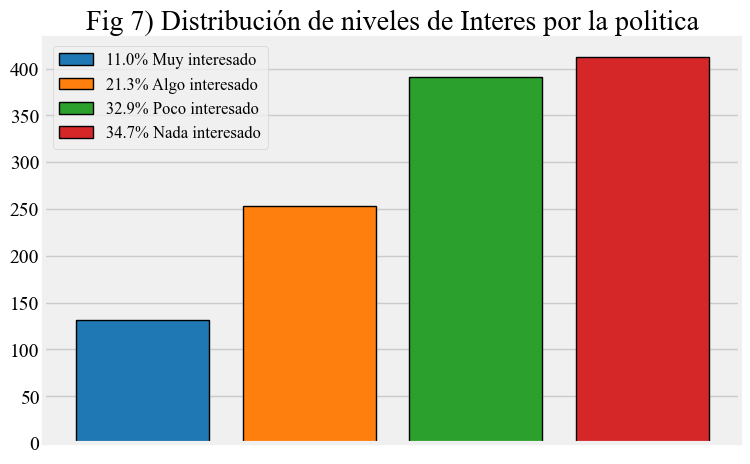

In [9]:
correspondencias = {1: "Muy interesado",
                    2: "Algo interesado",
                    3: "Poco interesado",
                    4: "Nada interesado",
                    8: "No sabe",
                    0: "No responde"
                    }

# Se establece el orden a seguir en la gráfica
orden = ["Muy interesado", "Algo interesado", "Poco interesado", "Nada interesado", "No sabe", "No responde"]

# Obteniendo los datos de satisfacción con la democracia
valores_numericos = datos['p46stgbs'].astype(int)

# Guardamos los valores correspondientes a cada nivivel de satisfación democrática en una variable, utilizando la tabla de correspondencias
valores = valores_numericos.map(lambda x: correspondencias.get(x))

# Obtener la frecuencia de cada nivel de satisfacción, las etiquetas y los porcentajes
frecuencia = valores.value_counts()
etiquetas = frecuencia.index
porcentajes = (frecuencia / sum(frecuencia)) * 100

## ordenar los datos de acuerdo al orden de los niveles
data_plot = pd.DataFrame({'Niveles': etiquetas, 'Frecuencia': frecuencia, 'Porcentaje': porcentajes})
data_plot['Orden'] = data_plot['Niveles'].map(lambda x: orden.index(x))
data_plot = data_plot.sort_values('Orden')


# Crear el gráfico de barras vertical con los datos ordenados
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(data_plot['Niveles'], data_plot['Frecuencia'], color=colormap.colors, edgecolor='black', linewidth=1)

# Establecemos el título de la gráfica
plt.title('Fig 7) Distribución de niveles de Interes por la politica')


# Crear leyenda con etiquetas y porcentajes
legend_elements = [matplotlib.patches.Patch(facecolor=colormap.colors[i], edgecolor='black', linewidth=1, label=f'{data_plot["Porcentaje"].iloc[i]:.1f}% {data_plot["Niveles"].iloc[i]}') for i in range(len(data_plot))]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12)

## Cambiando el tamaño de la caja de dibujo y ocultando las etiquetas del eje x
bbox_to_anchor=(1.05, 1)
ax.get_xaxis().set_visible(False)
plt.plot()

Por su parte, en cuanto a la posición política, se usaron valores de 0 a 10, en donde 0 expresaba una posición política de izquierda, y 10 de derecha. Aquí un hallazgo importante, es que la mayoría de los encuestados se ubica en un punto medio, en lo que se conoce como centro político (Tabla 2). Al respecto, es una tendencia actual en Colombia no identificarse con los partidos de extrema. Si bien, el país se ha caracterizado por la
polarización política, el afloramiento de partidos alternativos  y de centro ha atenuado esta situación. Es de rescatar, que la forma de distribución de los datos tiene un coeficiente de simetría de 0,16 lo que indica una pequeña cola hacia la derecha, lo cual se traduce en que hay una preferencia mayor por la izquierda política o ideologías cercanas a esta, no obstante, el coeficiente indica un grado de asimetría cercano a 0 (Figura 8). Se puede observar también que casi el mismo porcentaje de los encuestados manifiesta identificarse con la izquierda o la derecha política, pero el porcentaje de las personas que se ubican en el centro político es muy superior a los demás.

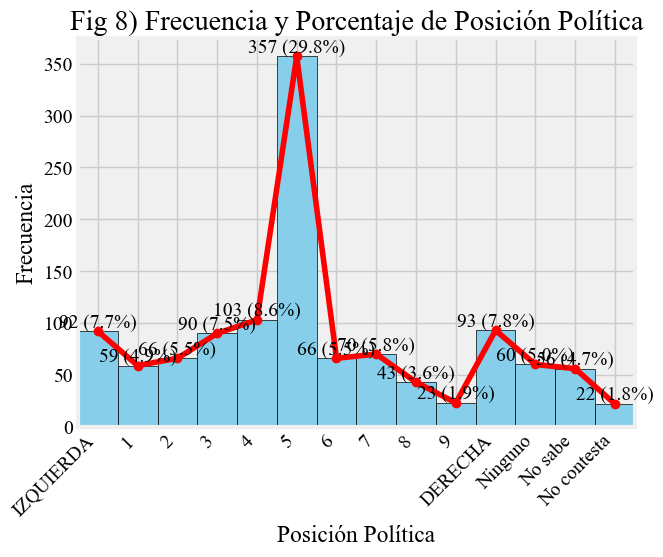

In [10]:
correspondencias = {0: "IZQUIERDA",
                    1: "1",
                    2: "2",
                    3: "3",
                    4: "4",
                    5: "5",
                    6: "6",
                    7: "7",
                    8: "8",
                    9: "9",
                    10: "DERECHA",
                    97: "Ninguno",
                    -1: "No sabe",
                    -2: "No contesta"
                    }

# Establecemos el orden a seguir en la gráfica
orden_categorias = ["IZQUIERDA", "1", "2", "3", "4", "5", "6", "7", "8", "9", "DERECHA", "Ninguno", "No sabe", "No contesta"]

# Obtenemos los datos de posición política
valores_numericos = datos['p18st'].astype(int)

# Guardamos los valores correspondientes a cada posición política en una variable, utilizando la tabla de correspondencias
valores = valores_numericos.map(lambda x: correspondencias.get(x))

# Obtener la frecuencia de cada posición política, las etiquetas y los porcentajes
frecuencia = valores.value_counts()
etiquetas = frecuencia.index
porcentajes = (frecuencia / sum(frecuencia)) * 100
porcentajes = [round(porcentaje, 2) for porcentaje in porcentajes]


# Guardmos los datos en un dataframe para poder ordenarlos
posicion_politica = pd.DataFrame({'Posicion': etiquetas, 'Frecuencia': frecuencia, 'Porcentaje': porcentajes})
posicion_politica = posicion_politica.sort_values('Posicion', key=lambda x: x.map(orden_categorias.index))

# Creamos la gráfica, y establecemos los parámetros
plt.figure()
bins = np.arange(len(orden_categorias) + 1) - 0.5
xlim = [min(bins), max(bins)]


# Graficamos el histograma con los parametros establecidos y los datos de data_plot
plt.hist(posicion_politica["Posicion"],weights=posicion_politica["Frecuencia"], bins=bins, edgecolor='black',  color = "skyblue")
plt.xlim(xlim)

# Configuramos las etiquetas del eje x para que salgan en un ángulo de 45 grados
plt.xticks(range(len(orden_categorias)), posicion_politica['Posicion'], rotation=45, ha='right')

# Ponemos el título de la gráfica
plt.title('Fig 8) Frecuencia y Porcentaje de Posición Política')

# Ponemos los porcentajes en la parte superior de cada barra
for i, v in enumerate(posicion_politica['Frecuencia']):
    plt.text(i, v, f'{v} ({posicion_politica["Porcentaje"].iloc[i]:.1f}%)', color='k', ha='center', va='bottom')

# Creamos una línea que representa la frecuencia de cada categoría
plt.plot(range(len(orden_categorias)), posicion_politica['Frecuencia'], marker='o', color='r')

# Establecemos el nombre de los ejes
plt.ylabel('Frecuencia')
plt.xlabel('Posición Política')

# Mostramos la gráfica
plt.show()


Si mostramos la tabla generada, tenemos:

In [11]:
columnas_deseadas = ["Posicion", "Frecuencia", "Porcentaje"]
df_columnas_deseadas = posicion_politica.loc[:, columnas_deseadas]
tabla = PrettyTable()
tabla.field_names = df_columnas_deseadas.columns
for fila in df_columnas_deseadas.itertuples(index=False):
    tabla.add_row(fila)


print(tabla)

leyenda = "Tabla 1) Posición política de los encuestados en Colombia"
print(leyenda)

+-------------+------------+------------+
|   Posicion  | Frecuencia | Porcentaje |
+-------------+------------+------------+
|  IZQUIERDA  |     92     |    7.67    |
|      1      |     59     |    4.92    |
|      2      |     66     |    5.5     |
|      3      |     90     |    7.5     |
|      4      |    103     |    8.58    |
|      5      |    357     |   29.75    |
|      6      |     66     |    5.5     |
|      7      |     70     |    5.83    |
|      8      |     43     |    3.58    |
|      9      |     23     |    1.92    |
|   DERECHA   |     93     |    7.75    |
|   Ninguno   |     60     |    5.0     |
|   No sabe   |     56     |    4.67    |
| No contesta |     22     |    1.83    |
+-------------+------------+------------+
Tabla 1) Posición política de los encuestados en Colombia


Seguidamente se indaga sobre la posibilidad de participar en ciertas acciones políticas, tales como participar en marchas autorizadas, participar en marchas no autorizadas

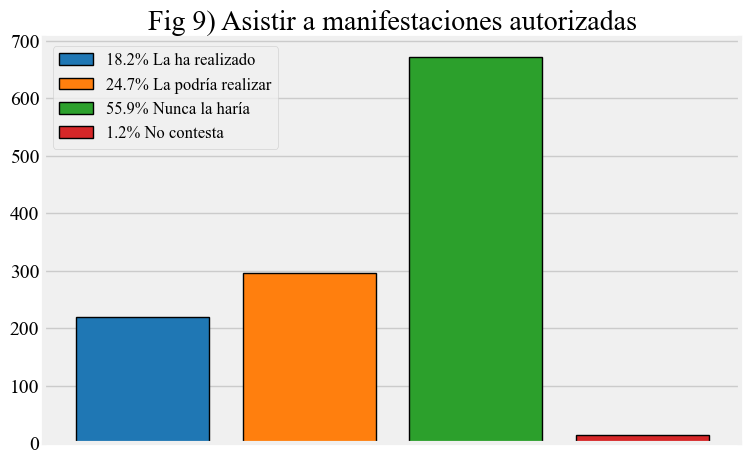

In [12]:
correspondencias = {1: "La ha realizado",
                    2: "La podría realizar",
                    3: "Nunca la haría",
                    -2: "No contesta",
                    -3: "No aplicable",
                    -4: "No preguntada",
                    -5: "No sabe / No contesta"}

orden = ["La ha realizado", "La podría realizar", "Nunca la haría", "No contesta", "No aplicable", "No preguntada", "No sabe / No contesta"]

# Obtenemos los datos sobre si participaría en manifestaciones autorizadas
valores_numericos = datos['p55st_b'].astype(int)

# Guardamos los valores correspondientes a cada respuesta en una variable, utilizando la tabla de correspondencias
valores = valores_numericos.map(lambda x: correspondencias.get(x))

# Calculamos la frecuencia de cada respuesta, las etiquetas y los porcentajes
frecuencias = valores.value_counts()
etiquetas = frecuencias.index
porcentajes = (frecuencias / sum(frecuencias)) * 100

## ordenar los datos de acuerdo al orden de los niveles
data_plot = pd.DataFrame({'Niveles': etiquetas, 'Frecuencia': frecuencias, 'Porcentaje': porcentajes})
data_plot = data_plot.sort_values('Niveles', key=lambda x: x.map(orden.index))

# Crear el gráfico de barras vertical con los datos ordenados
fig, ax = plt.subplots(figsize=(8, 5))
plt.title('Fig 9) Asistir a manifestaciones autorizadas')

bars = ax.bar(data_plot['Niveles'], data_plot['Frecuencia'], color=colormap.colors, edgecolor='black', linewidth=1)

legend_elements = [matplotlib.patches.Patch(facecolor=colormap.colors[i], edgecolor='black', linewidth=1, label=f'{data_plot["Porcentaje"].iloc[i]:.1f}% {data_plot["Niveles"].iloc[i]}') for i in range(len(data_plot))]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12)

## Cambiando el tamaño de la caja de dibujo y ocultando las etiquetas del eje x
bbox_to_anchor=(1.05, 1)
ax.get_xaxis().set_visible(False)

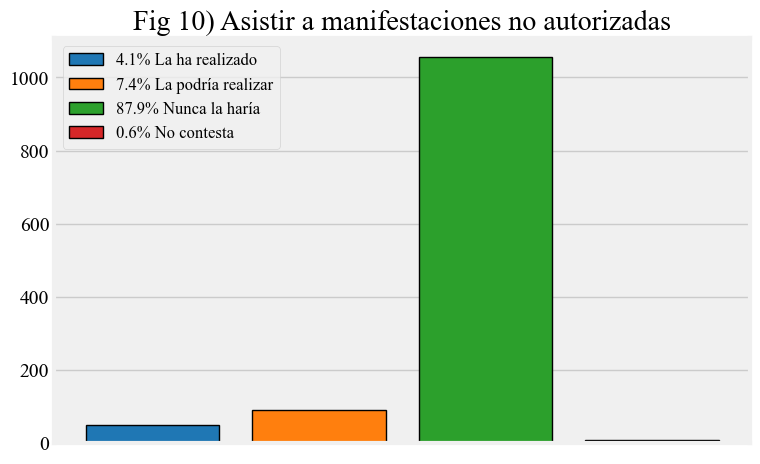

In [13]:
# Define the correspondence table between values and MarchasA levels
correspondencias = {1: "La ha realizado",
                    2: "La podría realizar",
                    3: "Nunca la haría",
                    -2: "No contesta",
                    -3: "No aplicable",
                    -4: "No preguntada",
                    -5: "No sabe / No contesta"}
orden = ["La ha realizado", "La podría realizar", "Nunca la haría", "No contesta", "No aplicable", "No preguntada", "No sabe / No contesta"]

# Obtenemos los datos sobre si participaría en manifestaciones no autorizadas
valores_numericos = datos['p55st_e'].astype(int)

# Guardamos los valores correspondientes a cada respuesta en una variable, utilizando la tabla de correspondencias
valores = valores_numericos.map(lambda x: correspondencias.get(x))

# Calculamos la frecuencia de cada respuesta, las etiquetas y los porcentajes
frecuencias = valores.value_counts()
etiquetas = frecuencias.index
porcentajes = (frecuencias / sum(frecuencias)) * 100

## ordenar los datos de acuerdo al orden establecido
data_plot = pd.DataFrame({'Niveles': etiquetas, 'Frecuencia': frecuencias, 'Porcentaje': porcentajes})
data_plot = data_plot.sort_values('Niveles', key=lambda x: x.map(orden.index))

# Crear el gráfico de barras vertical con los datos ordenados
fig, ax = plt.subplots(figsize=(8, 5))
plt.title('Fig 10) Asistir a manifestaciones no autorizadas')
bars = ax.bar(data_plot['Niveles'], data_plot['Frecuencia'], color=colormap.colors, edgecolor='black', linewidth=1)

# Crear leyenda con etiquetas y porcentajes
legend_elements = [matplotlib.patches.Patch(facecolor=colormap.colors[i], edgecolor='black', linewidth=1, label=f'{data_plot["Porcentaje"].iloc[i]:.1f}% {data_plot["Niveles"].iloc[i]}') for i in range(len(data_plot))]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12)

# Cambiando el tamaño de la caja de dibujo y ocultando las etiquetas del eje x
bbox_to_anchor=(1.05, 1)
ax.get_xaxis().set_visible(False)

# Mostramos la gráfica
plt.show()

## Conclusiones

Como se puede observar en la Figura 6, casi el 80% de los encuestados no se encuentra satisfechos con
la Democracia. Lo anterior, concuerda con los resultados cuando se les indagó sobre las garantías para
participar en política, para tener igualdad de oportunidades, garantías de seguridad social, etc., en donde
alrededor del 70% de la muestra manifiesta tener poca o nulas garantías en estos ámbitos . Por otra parte,
el 70% de los encuestados manifiesta estar poco o nada interesado en la política, y cuando se les indaga
sobre su posición política, la mayoría de los encuestados se ubica en un punto medio, en lo que se conoce
como centro político (Tabla 1), aunque se halla una sutil preferencia mayor por la izquierda política o ideologías
cercanas a esta (Figura 7). Sin embargo, casi el mismo porcentaje de los encuestados se identifica con la
izquierda y la derecha política, pero el porcentaje de las personas que se identifican con el centro político es
muy superior a los demás. Lo anterior puede justificarse por la despolarización política de los últimos años, el
afloramiento de partidos alternativos de centro, y el descontento generalizado por los partidos tradicionales de
derecha y de izquierda.
Ahora bien, cuando se les indaga a los participantes de la posibilidad de realizar ciertas acciones políticas
como asistir a protestas autorizadas o no autorizadas (Figura 9), hay una mercada distancia del ciudadano
colombiano con la protesta social, en especial cuando estas rayan en la ilegalidad (Figura 10)

## REFERENCIAS BIBLIOGRÁFICAS
CEPAL. (s.f.). Datos y Estadísticas. Obtenido de https://www.cepal.org/es 

Corporación Latinobarómetro. (s.f.). Latinobarómetro: opinión pública latinoamericana. Obtenido de https://www.latinobarometro.org/lat.jsp?Idioma=724

Corporación Latinobarómetro. (2020). Informe 2021: Adiós a Macondo. Obtenido de https://www.latinobarometro.org/lat.jsp?Idioma=724


Cruz, E. (2014). Dignidad en movimiento. El ascenso de la movilización social en Colombia (2010- 2014).

Confluenze. Rivista di Studi Iberoamericani, 6(2), 241-275.

Cruz, E. (2015). El derecho a la protesta social en Colombia. Pensamiento jurídico, (42), 47-69.

DANE. (2018). Dane: información para todos. Obtenido de Censo Nacional de Población y Vivienda: https://www.dane.gov.co/

Klesner, J. (2009). “Who Participates? Determinants of Political Action in Mexico”. Latin American Politics and Society 51(2): 59-90.

Moseley, M. (2015). Contentious Engagement: Understanding Protest Participation in Latin American Democracies. Journal of Politics in Latin America (7) (3), 3-48.

Ossandon, R.., & Dintrans, C. (2017). Disposición de los latinoamericanos hacia la protesta. Un análisis exploratorio a partir de Latinobarómetro 2015. Revista Chilena de Derecho y Ciencia Política, 8(2), 187- 211.

Rozas, J., & Somma ,M. (2020). Determinantes de la protesta juvenil en Chile. Revista mexicana de sociología, 82(3), 673-703.

UNESCO. (s.f.). Unesco-educación. Obtenido de https://www.unesco.org/es